In [65]:
import os
import regex as re
import numpy as np
import json

In [4]:
def readText(path):
    with open(path) as f:
        captions = f.read()
    return captions

In [11]:
captions = readText('./Flickr8k_text/Flickr8k.token.txt')
captions = captions.split('\n')[:-1]
print(len(captions))

40460


In [13]:
captions[0].split('\t')

['1000268201_693b08cb0e.jpg#0',
 'A child in a pink dress is climbing up a set of stairs in an entry way .']

In [27]:
#Creating a dictionary for all images and their captions

descriptions = {}

for caption in captions:
    img_name,img_captions = caption.split('\t')
    img_name = img_name.split('#')[0]
    
    if descriptions.get(img_name) is None:
        descriptions[img_name] = []
        
    descriptions[img_name].append(img_captions)
    

In [28]:
print(len(descriptions))

8092


In [29]:
descriptions['1000268201_693b08cb0e.jpg']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

'Flickr8k_Dataset/Flicker8k_Dataset/1000268201_693b08cb0e.jpg'

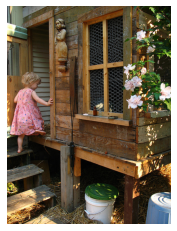

In [53]:
import cv2
from matplotlib import pyplot as plt

img_path = 'Flickr8k_Dataset/Flicker8k_Dataset/'
img = cv2.imread(img_path+'1000268201_693b08cb0e.jpg')
img_show = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.axis('off')

'Flickr8k_Dataset/Flicker8k_Dataset/1000268201_693b08cb0e.jpg'

# Cleaning Data

In [56]:
def clean_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub('[^a-z]+',' ',sentence)
    return sentence

In [60]:
for img,captions_list in descriptions.items():
    for i in range(len(captions_list)):
        captions_list[i] = clean_text(captions_list[i])

In [64]:
with open('descriptions.text','w') as f:
    f.write(str(descriptions))
    